In [27]:

%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wget

import seaborn
import numpy as np
import pandas as pd
import pylab
import sklearn.preprocessing

import scgenome

import dbclients.tantalus
import datamanagement.transfer_files

import envsetup

tickets = [
    'SC-1577',
    'SC-1579',
    'SC-1581',
]

sample_ids = [
    'SA1090',
    'SA921',
    'SA922',
]

local_storage_directory = '/home/ubuntu/tantalus_data/'

pseudobulk_ticket_id = 'SC-1635'
results_tag_name = pseudobulk_ticket_id + '_results'
results_storage_name = 'singlecellresults'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:

tantalus_api = dbclients.tantalus.TantalusApi()

datamanagement.transfer_files.cache_tagged_datasets(
    results_tag_name,
    results_storage_name,
    local_storage_directory,
)

local_results_client = tantalus_api.get_cache_client(local_storage_directory)


2019-01-24 18:10:25,392 - INFO - 504082b2-72f3-4a74-a27b-328d6d90ad62 - TokenRequest:Getting token with client credentials.
2019-01-24 18:10:25,636 - INFO - 504082b2-72f3-4a74-a27b-328d6d90ad62 - OAuth2Client:Get Token Server returned this correlation_id: 504082b2-72f3-4a74-a27b-328d6d90ad62
2019-01-24 18:10:26,854 - INFO - starting caching SC-1635/results/haplotypes.tsv to /home/ubuntu/tantalus_data/
2019-01-24 18:10:26,920 - INFO - skipping transfer of file resource SC-1635/results/haplotypes.tsv that matches existing file
2019-01-24 18:10:26,921 - INFO - starting caching SC-1635/results/SA921_allele_counts.csv to /home/ubuntu/tantalus_data/
2019-01-24 18:10:26,931 - INFO - skipping transfer of file resource SC-1635/results/SA921_allele_counts.csv that matches existing file
2019-01-24 18:10:26,933 - INFO - starting caching SC-1635/results/SA921_snv_annotations.h5 to /home/ubuntu/tantalus_data/
2019-01-24 18:10:26,943 - INFO - skipping transfer of file resource SC-1635/results/SA921_s

2019-01-24 18:10:27,281 - INFO - starting caching SC-1635/results/SA1090_museq.vcf.gz to /home/ubuntu/tantalus_data/
2019-01-24 18:10:27,291 - INFO - skipping transfer of file resource SC-1635/results/SA1090_museq.vcf.gz that matches existing file
2019-01-24 18:10:27,292 - INFO - starting caching SC-1635/results/SA1090_museq.vcf.gz.csi to /home/ubuntu/tantalus_data/
2019-01-24 18:10:27,303 - INFO - skipping transfer of file resource SC-1635/results/SA1090_museq.vcf.gz.csi that matches existing file
2019-01-24 18:10:27,305 - INFO - starting caching SC-1635/results/SA1090_museq.vcf.gz.tbi to /home/ubuntu/tantalus_data/
2019-01-24 18:10:27,314 - INFO - skipping transfer of file resource SC-1635/results/SA1090_museq.vcf.gz.tbi that matches existing file
2019-01-24 18:10:27,316 - INFO - starting caching SC-1635/results/SA1090_strelka_snv.vcf.gz to /home/ubuntu/tantalus_data/
2019-01-24 18:10:27,327 - INFO - skipping transfer of file resource SC-1635/results/SA1090_strelka_snv.vcf.gz that ma


# Load segment data


In [7]:

import scgenome.dataimport

results = scgenome.dataimport.import_cn_data(
    tickets,
    sample_ids,
    local_storage_directory,
)

cn_data = results['hmmcopy_reads']
metrics_data = results['hmmcopy_metrics']


2019-01-24 18:16:27,527 - INFO - 68508807-6832-4ce1-aa9d-229a00c1b2ee - TokenRequest:Getting token with client credentials.
2019-01-24 18:16:31,520 - INFO - 68508807-6832-4ce1-aa9d-229a00c1b2ee - OAuth2Client:Get Token Server returned this correlation_id: 68508807-6832-4ce1-aa9d-229a00c1b2ee
2019-01-24 18:16:33,023 - INFO - starting caching SC-1577/results/results/hmmcopy_autoploidy/plots/A90554A_kernel_density.pdf to /home/ubuntu/tantalus_data/
2019-01-24 18:16:33,106 - INFO - skipping transfer of file resource SC-1577/results/results/hmmcopy_autoploidy/plots/A90554A_kernel_density.pdf that matches existing file
2019-01-24 18:16:33,107 - INFO - starting caching SC-1577/results/results/hmmcopy_autoploidy/plots/A90554A_metrics.pdf to /home/ubuntu/tantalus_data/
2019-01-24 18:16:33,119 - INFO - skipping transfer of file resource SC-1577/results/results/hmmcopy_autoploidy/plots/A90554A_metrics.pdf that matches existing file
2019-01-24 18:16:33,120 - INFO - starting caching SC-1577/results

2019-01-24 18:16:56,122 - INFO - starting caching SC-1581/results/results/alignment/A90554B_alignment_metrics.h5 to /home/ubuntu/tantalus_data/
2019-01-24 18:16:56,134 - INFO - skipping transfer of file resource SC-1581/results/results/alignment/A90554B_alignment_metrics.h5 that matches existing file
2019-01-24 18:16:56,136 - INFO - starting caching SC-1581/results/results/alignment/plots/A90554B_plot_metrics.pdf to /home/ubuntu/tantalus_data/
2019-01-24 18:16:56,147 - INFO - skipping transfer of file resource SC-1581/results/results/alignment/plots/A90554B_plot_metrics.pdf that matches existing file


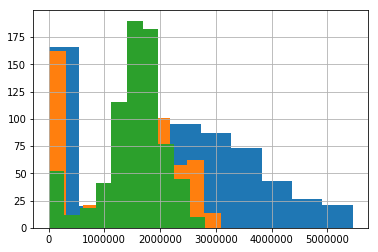

In [8]:

cn_data['integer_copy_number'] = cn_data['state']

for library_id, library_metrics_data in metrics_data.groupby('library_id'):
    library_metrics_data['total_mapped_reads'].hist()



# Filtering


1966
1579
1413


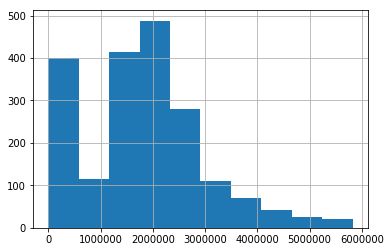

In [9]:

cn_data.groupby('cell_id')['reads'].sum().hist()

cell_read_counts = cn_data.groupby('cell_id')['reads'].sum().rename('total_reads')
cell_read_counts = cell_read_counts[cell_read_counts > 500000]

filtered_cell_ids = metrics_data[metrics_data['quality'] > 0.5][['cell_id']].drop_duplicates()

print len(cn_data['cell_id'].unique())
cn_data = cn_data.merge(cell_read_counts.reset_index())
print len(cn_data['cell_id'].unique())
cn_data = cn_data.merge(filtered_cell_ids.reset_index())
print len(cn_data['cell_id'].unique())


In [10]:

import scgenome.cncluster

cn = cn_data.set_index(['chr', 'start', 'cell_id'])['integer_copy_number'].unstack(level=2).fillna(0)

cluster_df = scgenome.cncluster.umap_hdbscan_cluster(cn)

if 'cluster_id' in cn_data:
    cn_data.drop('cluster_id', axis=1, inplace=True)

cn_data = cn_data.merge(cluster_df)

if 'clone_cn' in cn_data:
    cn_data.drop('clone_cn', axis=1, inplace=True)

clone_cn = (
    cn_data.groupby(['chr', 'start', 'cluster_id'])['integer_copy_number']
    .median().rename('clone_cn').reset_index())
cn_data = cn_data.merge(clone_cn)

cluster_df.groupby('cluster_id').size().rename('size').reset_index()


,cluster_id,size
0,-1,56
1,0,36
2,1,172
3,2,223
4,3,57
5,4,34
6,5,93
7,6,173
8,7,33
9,8,107


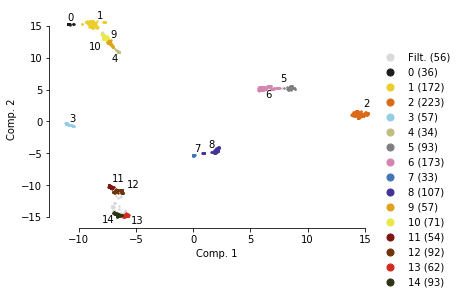

In [11]:

scgenome.cncluster.plot_umap_clusters(plt.gca(), cluster_df)


In [13]:

# cn_data2 = cn_data.copy()
# cn_data2['clone_var'] = np.square(cn_data2['integer_copy_number'] - cn_data2['clone_cn'])
# clone_std = cn_data2.groupby('cell_id')['clone_var'].sum().pow(1./2).rename('clone_std').reset_index()
# clone_rms = cn_data2.groupby('cell_id')['clone_var'].mean().pow(1./2).rename('clone_rms').reset_index()

# cluster_df = cluster_df.merge(clone_std)
# cluster_df = cluster_df.merge(clone_rms)

# cluster_df['clone_std'] = cluster_df['clone_std']#.clip_upper(75.)

# fig = plt.figure(figsize=(8, 8))
# plt.scatter(
#     cluster_df['umap1'].values,
#     cluster_df['umap2'].values,
#     c=cluster_df['clone_std'].values,
#     cmap=plt.get_cmap("Reds"),
#     s=2)

# fig = plt.figure()
# cluster_df['clone_std'].hist(bins=30)

# print len(cluster_df['cell_id'].unique())
# cluster_df = cluster_df[cluster_df['clone_std'] < 60.]
# print len(cluster_df['cell_id'].unique())
# clone_counts = cluster_df.groupby('cluster_id')['cell_id'].count()
# print clone_counts
# clone_counts_filter = clone_counts[clone_counts >= 50].reset_index()
# cluster_df = cluster_df.merge(clone_counts_filter[['cluster_id']])
# print len(cluster_df['cell_id'].unique())
# print cluster_df.groupby('cluster_id')['cell_id'].count().describe()

# cluster_df['is_filtered'] = cluster_df['clone_std'] < 60.
# seaborn.factorplot(data=cluster_df, x='is_filtered', y='clone_std', kind='strip', jitter=True)
# seaborn.factorplot(data=cluster_df, x='is_filtered', y='clone_rms', kind='strip', jitter=True)

# cn_data_filtered = cn_data[cn_data['cell_id'].isin(cluster_df['cell_id'].unique())]

# cluster_df.groupby('is_filtered')['clone_std'].describe()
# cluster_df.groupby('is_filtered')['clone_rms'].describe()

# cluster_df = pd.read_csv('ov2295_umap_clusters.tsv', sep='\t').rename(columns={'gm_umap_cluster': 'cluster_id'})

cn_data_filtered = cn_data.drop('cluster_id', axis=1).merge(cluster_df)
cn_data_filtered = cn_data_filtered.query('cluster_id >= 0')

# cn_data_filtered.head()


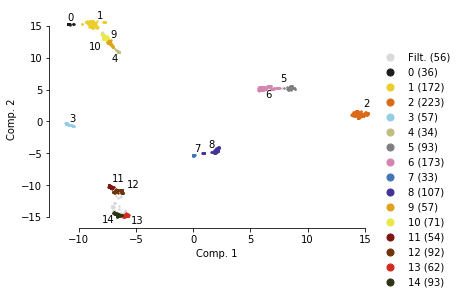

In [14]:

scgenome.cncluster.plot_umap_clusters(plt.gca(), cluster_df)


cell_id             SA922-A90554B-R23-C24 SA922-A90554B-R23-C34  \
cluster_id                             0                     0    
chr_index start                                                   
0         1                             6                     6   
          500001                        6                     6   
          1000001                       6                     6   
          1500001                       6                     6   
          2000001                       6                     6   
          2500001                       6                     6   
          3000001                       6                     6   
          3500001                       6                     6   
          4000001                       6                     6   
          4500001                       6                     6   
          5000001                       6                     6   
          5500001                       6                     6   
          6000001                       6                     6   
          6500001                       6                     6   
          7000001                       6                     6   
          7500001                       6                     6   
          8000001                       5                     5   
          8500001                       5                     5   
          9000001                       5                     5   
          9500001                       5                     5   
          10000001                      5                     5   
          10500001                      5                     5   
          11000001                      5                     5   
          11500001                      5                     5   
          12000001                      5                     5   
          12500001                      5                     5   
          13000001                      5                     5   
          13500001                      5                     5   
          14000001                      5                     5   
          14500001                      5                     5   
...                                   ...                   ...   
22        140500001                     3                     2   
          141000001                     3                     2   
          141500001                     3                     2   
          142000001                     3                     2   
          142500001                     3                     2   
          143000001                     3                     2   
          143500001                     3                     2   
          144000001                     3                     2   
          144500001                     3                     2   
          145000001                     3                     2   
          145500001                     3                     2   
          146000001                     3                     2   
          146500001                     3                     2   
          147000001                     3                     2   
          147500001                     3                     2   
          148000001                     3                     2   
          148500001                     3                     2   
          149000001                     3                     2   
          149500001                     3                     2   
          150000001                     3                     2   
          150500001                     3                     2   
          151000001                     3                     2   
          151500001                     3                     2   
          152000001                     3                     2   
          152500001                     3                     2   
          153000001                     3      

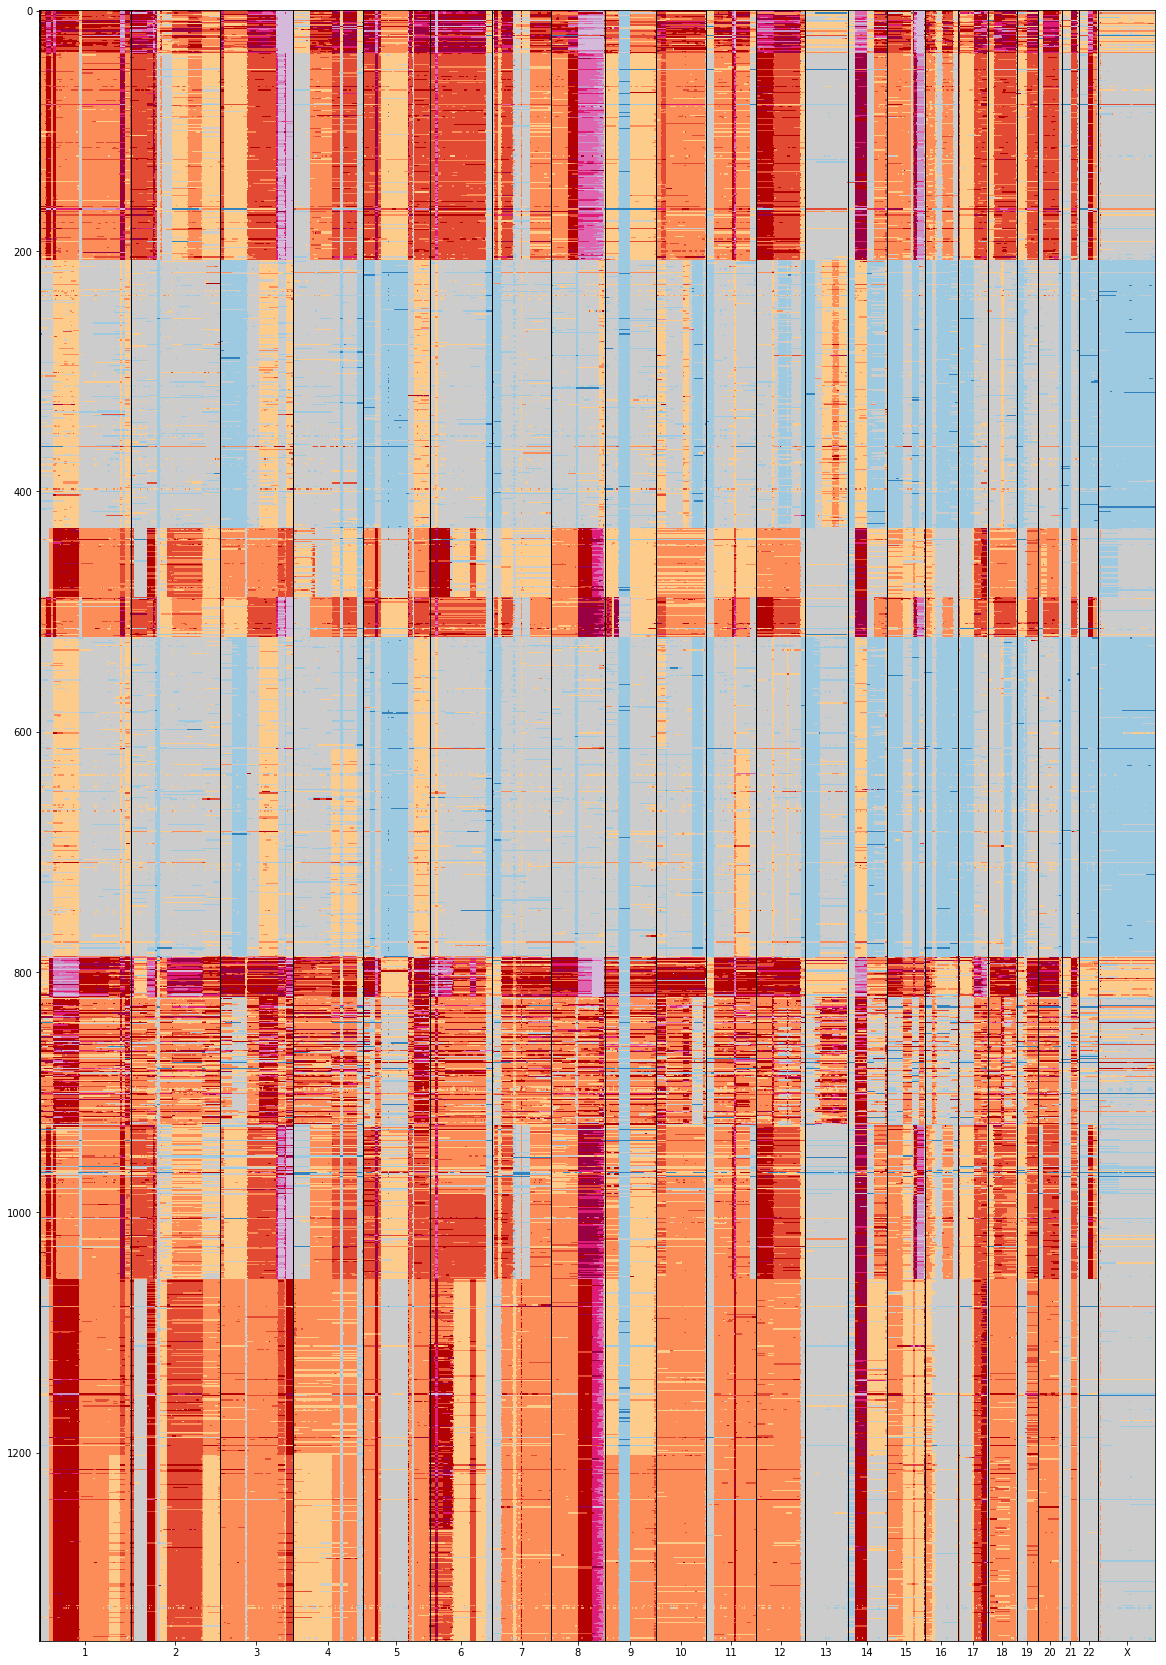

In [15]:

import scgenome.cnplot

fig = plt.figure(figsize=(20, 30))
ax = fig.add_subplot(111)
scgenome.cnplot.plot_clustered_cell_cn_matrix(ax, cn_data_filtered, 'integer_copy_number')


In [16]:

cn_data.head()


,chr,start,end,cell_id,gc,reads,copy,state,sample_id,library_id,integer_copy_number,total_reads,index,cluster_id,umap1,umap2,clone_cn
0,1,1,500000,SA921-A90554A-R05-C57,-1.0,21,NaN,2,SA921,A90554A,2,4273149,4,12,-6.179111,-11.190058,3.0
1,1,1,500000,SA921-A90554A-R06-C09,-1.0,19,NaN,2,SA921,A90554A,2,4684426,22,12,-6.242877,-11.153743,3.0
2,1,1,500000,SA921-A90554A-R09-C61,-1.0,8,NaN,2,SA921,A90554A,2,2297519,25,12,-6.370728,-10.773621,3.0
3,1,1,500000,SA921-A90554A-R09-C68,-1.0,9,NaN,4,SA921,A90554A,4,1113659,32,12,-6.714860,-10.868498,3.0
4,1,1,500000,SA921-A90554A-R10-C13,-1.0,10,NaN,4,SA921,A90554A,4,4537585,49,12,-6.588724,-11.237888,3.0


ValueError: cannot convert float NaN to integer

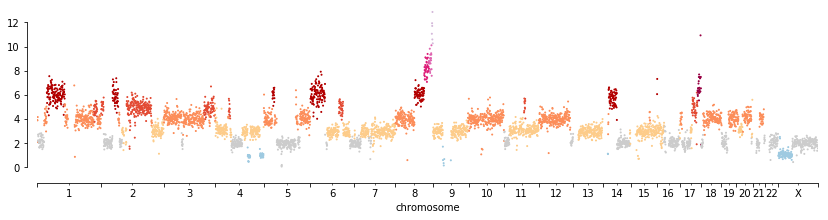

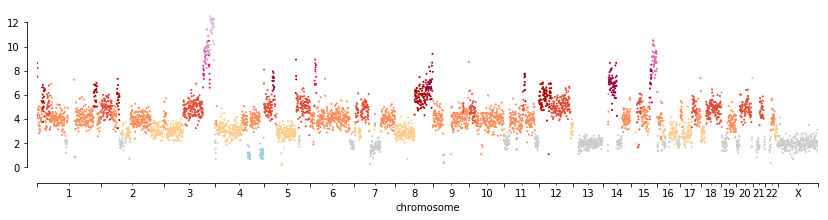

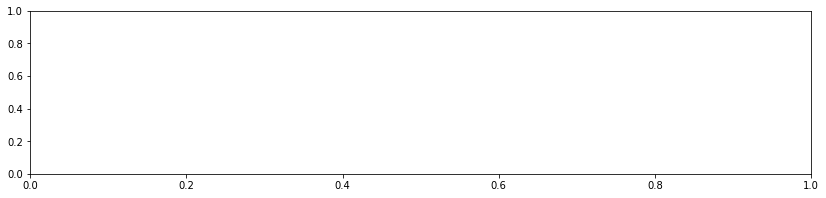

In [17]:

import matplotlib

cn_data_filtered['cell_id2'] = cn_data_filtered['cell_id'].apply(lambda a: a.split('-', 1)[1])

fig = plt.figure(figsize=(14, 3))
ax = fig.add_subplot(111)
scgenome.cnplot.plot_cell_cn_profile(
    ax, cn_data_filtered.query('cell_id2 == "A90554A-R14-C68"'), 'copy', 'integer_copy_number')

fig = plt.figure(figsize=(14, 3))
ax = fig.add_subplot(111)
scgenome.cnplot.plot_cell_cn_profile(
    ax, cn_data_filtered.query('cell_id2 == "A90554B-R34-C34"'), 'copy', 'integer_copy_number')

fig = plt.figure(figsize=(14, 3))
ax = fig.add_subplot(111)
scgenome.cnplot.plot_cell_cn_profile(
    ax, cn_data_filtered.query('cell_id2 == "A90554B-R30-C67"'), 'copy', 'integer_copy_number')


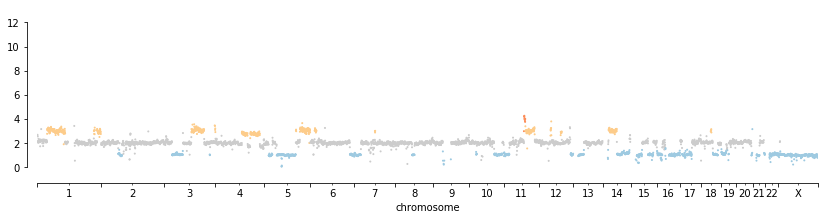

In [34]:

clone_cn_state = (
    cn_data_filtered.groupby(['chr', 'start', 'end', 'cluster_id'])['integer_copy_number']
    .median().astype(int).reset_index())

clone_cn_copy = (
    cn_data_filtered.groupby(['chr', 'start', 'end', 'cluster_id'])['copy']
    .mean().reset_index())

clone_cn_data = clone_cn_state.merge(clone_cn_copy)

clone_cn_data.to_csv('ov2295_clone_cn.csv', index=False)

fig = plt.figure(figsize=(14, 3))
ax = fig.add_subplot(111)
scgenome.cnplot.plot_cell_cn_profile(
    ax, clone_cn_data.query('cluster_id == 6'), 'copy', 'integer_copy_number')


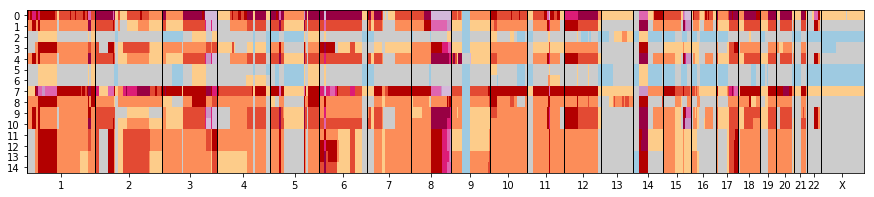

In [35]:

import scgenome.cnplot

fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(111)
scgenome.cnplot.plot_cluster_cn_matrix(ax, cn_data_filtered, 'integer_copy_number')



# Cell specific haplotype block allele counts


In [29]:

allele_counts = []

for sample_id in sample_ids:
    filename = '{}/results/{}_allele_counts.csv'.format(
        pseudobulk_ticket_id, sample_id)
    filepath = local_results_client.get_url(filename)
    allele_data = pd.read_csv(filepath)
    allele_counts.append(allele_data)

allele_counts = pd.concat(allele_counts, ignore_index=True)

allele_counts.head()


,allele_id,cell_id,chromosome,end,hap_label,readcount,start
0,1,SA1090-A96213A-R34-C64,1,1500000,48,1,1000000
1,1,SA1090-A96213A-R34-C64,1,2000000,73,1,1500000
2,1,SA1090-A96213A-R34-C64,1,2500000,162,1,2000000
3,1,SA1090-A96213A-R34-C64,1,3500000,194,1,3000000
4,0,SA1090-A96213A-R34-C64,1,3845268,243,1,3500000


In [30]:

index_cols = [
    'chromosome',
    'start',
    'end',
    'hap_label',
]

bin_size = 500000

allele_counts = allele_counts.set_index(index_cols + ['cell_id', 'allele_id'])['readcount'].unstack(fill_value=0)
allele_counts.rename(columns={0: 'allele_1', 1: 'allele_2'}, inplace=True)
allele_counts.reset_index(inplace=True)
allele_counts = allele_counts.merge(cluster_df)
allele_counts = allele_counts.groupby(index_cols + ['cluster_id'])[['allele_1', 'allele_2']].sum().reset_index()
allele_counts['total'] = allele_counts['allele_1'] + allele_counts['allele_2']
allele_counts['start'] = (allele_counts['start'] / bin_size).astype(int) * bin_size + 1
allele_counts['end'] = allele_counts['start'] + bin_size - 1
allele_counts.head()


,chromosome,start,end,hap_label,cluster_id,allele_1,allele_2,total
0,1,1,500000,0,-1,3,1,4
1,1,1,500000,0,1,4,7,11
2,1,1,500000,0,2,2,13,15
3,1,1,500000,0,3,1,4,5
4,1,1,500000,0,4,1,4,5


In [31]:

allele_counts.query('cluster_id == 6').head(10)


,chromosome,start,end,hap_label,cluster_id,allele_1,allele_2,total
6,1,1,500000,0,6,1,4,5
18,1,1,500000,1,6,0,1,1
25,1,1,500000,2,6,5,0,5
36,1,1,500000,3,6,0,3,3
45,1,1,500000,4,6,13,4,17
58,1,1,500000,5,6,3,6,9
68,1,500001,1000000,6,6,13,0,13
79,1,500001,1000000,7,6,13,1,14
93,1,500001,1000000,8,6,6,2,8
106,1,500001,1000000,9,6,8,1,9


/anaconda/envs/py27/lib/python2.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


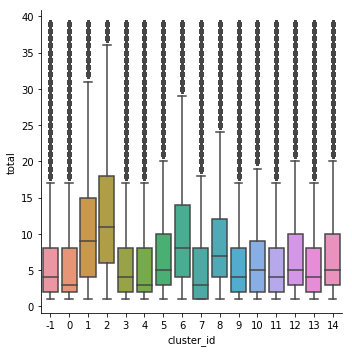

In [32]:

plot_data = allele_counts.query('total < 40')
seaborn.factorplot(x='cluster_id', y='total', kind='box', data=plot_data)



## Infer allele specific CN


In [36]:

import scgenome.snpdata

data = allele_counts.rename(columns={
    'chromosome': 'chr',
    'total': 'total_counts_sum',
    'allele_1': 'allele_1_sum',
    'allele_2': 'allele_2_sum',
})

hap_data = data.copy()

hap_data = hap_data[hap_data['total_counts_sum'] > 5].copy()

hap_data['maf'] = (
    np.minimum(hap_data['allele_1_sum'], hap_data['allele_2_sum']) /
    hap_data['total_counts_sum'].astype(float))

allele_cn = scgenome.snpdata.infer_allele_cn(clone_cn_data, data)

allele_cn['maf'] = (
    np.minimum(allele_cn['allele_1_sum'], allele_cn['allele_2_sum']) /
    allele_cn['total_counts_sum'].astype(float))

allele_cn.query('chr == "4"').query('total_counts_sum > 100').head()


/home/ubuntu/notebooks/pseudo_wgs/scgenome/scgenome/snpdata.py:114: RuntimeWarning: divide by zero encountered in divide
  p = minor_cn / cn['total_cn'].values[:, np.newaxis]
/home/ubuntu/notebooks/pseudo_wgs/scgenome/scgenome/snpdata.py:114: RuntimeWarning: invalid value encountered in divide
  p = minor_cn / cn['total_cn'].values[:, np.newaxis]
/anaconda/envs/py27/lib/python2.7/site-packages/scipy/stats/_discrete_distns.py:46: RuntimeWarning: invalid value encountered in greater_equal
  return (n >= 0) & (p >= 0) & (p <= 1)
/anaconda/envs/py27/lib/python2.7/site-packages/scipy/stats/_discrete_distns.py:46: RuntimeWarning: invalid value encountered in less_equal
  return (n >= 0) & (p >= 0) & (p <= 1)


,chr,start,end,cluster_id,total_cn,copy,hap_label,allele_1_sum,allele_2_sum,total_counts_sum,minor_cn,major_cn,maf
943021,4,1,500000,0,6.0,0.0,2.0,77.0,93.0,170.0,2,4.0,0.452941
943030,4,1,500000,0,6.0,0.0,13.0,127.0,149.0,276.0,2,4.0,0.460145
943039,4,1,500000,1,4.0,0.0,2.0,427.0,389.0,816.0,1,3.0,0.476716
943050,4,1,500000,1,4.0,0.0,13.0,638.0,750.0,1388.0,1,3.0,0.459654
943052,4,1,500000,1,4.0,0.0,15.0,257.0,289.0,546.0,1,3.0,0.470696



## Allele plot for clone 1


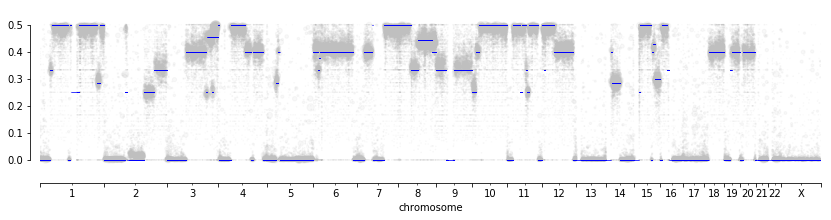

In [37]:

plot_cluster_id = 1

hap_data['maf'] = (
    np.minimum(hap_data['allele_1_sum'], hap_data['allele_2_sum']) /
    hap_data['total_counts_sum'].astype(float))

fig = plt.figure(figsize=(14, 3))
ax = fig.add_subplot(111)
scgenome.snpdata.plot_cell_vaf_profile(
    ax, hap_data.query('cluster_id == {}'.format(plot_cluster_id)), 'maf',
    size_field_name='total_counts_sum',
    size_scale=100.,
)   

allele_cn['cn_ratio'] = allele_cn['minor_cn'] / allele_cn['total_cn']

import scgenome.refgenome as refgenome
from matplotlib import collections  as mc

plot_data = allele_cn.query('cluster_id == {}'.format(plot_cluster_id)).copy()
plot_data = plot_data[plot_data['chr'].isin(refgenome.info.chromosomes)]

plot_data.set_index('chr', inplace=True)
plot_data['chromosome_start'] = refgenome.info.chromosome_start
plot_data.reset_index(inplace=True)

plot_data['start'] = plot_data['start'] + plot_data['chromosome_start']
plot_data['end'] = plot_data['end'] + plot_data['chromosome_start']

lines = np.zeros((plot_data.shape[0], 2, 2))
lines[:, 0, 0] = plot_data['start'].values
lines[:, 1, 0] = plot_data['end'].values
lines[:, 0, 1] = plot_data['cn_ratio'].values
lines[:, 1, 1] = plot_data['cn_ratio'].values

lc = mc.LineCollection(lines, colors='b', linewidths=1.)
ax.add_collection(lc)



In [38]:

allele_cn = scgenome.snpdata.infer_allele_cn(clone_cn_data, hap_data)
allele_cn.head()


,chr,start,end,cluster_id,total_cn,copy,hap_label,allele_1_sum,allele_2_sum,total_counts_sum,maf,minor_cn,major_cn
0,1,1,500000,0,6.0,0.0,0.0,0.0,0.0,0.0,0.000000,0,6.0
1,1,1,500000,1,5.0,0.0,0.0,4.0,7.0,11.0,0.363636,0,5.0
2,1,1,500000,1,5.0,0.0,2.0,6.0,1.0,7.0,0.142857,0,5.0
3,1,1,500000,2,2.0,0.0,0.0,2.0,13.0,15.0,0.133333,0,2.0
4,1,1,500000,2,2.0,0.0,2.0,6.0,0.0,6.0,0.000000,0,2.0


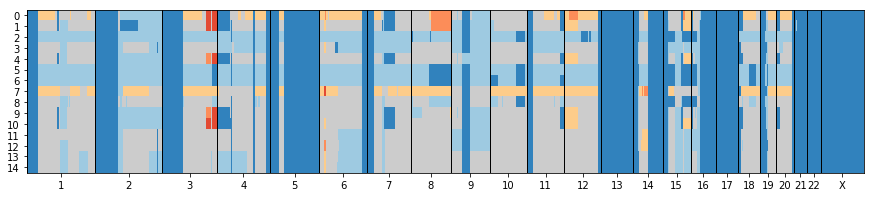

In [39]:

fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(111)
scgenome.cnplot.plot_cluster_cn_matrix(ax, allele_cn, 'minor_cn')



# Load SNV Data


In [40]:

import scgenome.snvdata

snv_data = []
for sample_id in sample_ids:
    filename = '{}/results/{}_snv_annotations.h5'.format(
        pseudobulk_ticket_id, sample_id)
    filepath = local_results_client.get_url(filename)
    print 'reading', filepath
    snv_data.append(scgenome.snvdata.get_snv_results(filepath))
snv_data = pd.concat(snv_data, ignore_index=True)

snv_data.head()


reading /home/ubuntu/tantalus_data/SC-1635/results/SA1090_snv_annotations.h5
starting load
strelka (22751, 5)
museq (159387, 5)
finishing load (4975, 2)
reading /home/ubuntu/tantalus_data/SC-1635/results/SA921_snv_annotations.h5
starting load
strelka (15214, 5)
museq (58724, 5)
finishing load (5682, 2)
reading /home/ubuntu/tantalus_data/SC-1635/results/SA922_snv_annotations.h5
starting load
strelka (16595, 5)
museq (61359, 5)
finishing load (6298, 2)


,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id,mappability,strelka_score,museq_score,is_cosmic,HIGH,LOW,MODERATE,MODIFIER,tri_nucleotide_context
0,X,115536353,T,A,0,2,SA1090-A96213A-R20-C06,1.0,278,0.97,NaN,0,0,0,1,TTC
1,X,115536353,T,A,0,1,SA1090-A96213A-R20-C21,1.0,278,0.97,NaN,0,0,0,1,TTC
2,X,115536353,T,A,0,1,SA1090-A96213A-R20-C38,1.0,278,0.97,NaN,0,0,0,1,TTC
3,X,115536353,T,A,0,1,SA1090-A96213A-R20-C69,1.0,278,0.97,NaN,0,0,0,1,TTC
4,X,115536353,T,A,0,2,SA1090-A96213A-R22-C24,1.0,278,0.97,NaN,0,0,0,1,TTC


In [41]:

positions = snv_data[['chrom', 'coord', 'ref', 'alt']].drop_duplicates()

snv_count_data = []
for sample_id in sample_ids:
    filename = '{}/results/{}_snv_counts.h5'.format(
        pseudobulk_ticket_id, sample_id)
    filepath = local_results_client.get_url(filename)
    print 'reading', filepath
    with pd.HDFStore(filepath, 'r') as store:
        snv_count_data.append(store['/snv_allele_counts'].merge(positions, how='inner'))
snv_count_data = pd.concat(snv_count_data, ignore_index=True)

snv_count_data.head()


reading /home/ubuntu/tantalus_data/SC-1635/results/SA1090_snv_counts.h5
reading /home/ubuntu/tantalus_data/SC-1635/results/SA921_snv_counts.h5
reading /home/ubuntu/tantalus_data/SC-1635/results/SA922_snv_counts.h5


,chrom,coord,ref,alt,ref_counts,alt_counts,cell_id
0,X,115536353,T,A,0,2,SA1090-A96213A-R20-C06
1,X,115536353,T,A,0,1,SA1090-A96213A-R20-C21
2,X,115536353,T,A,0,1,SA1090-A96213A-R20-C38
3,X,115536353,T,A,0,1,SA1090-A96213A-R20-C69
4,X,115536353,T,A,0,2,SA1090-A96213A-R22-C24


In [42]:

snv_data = snv_data.drop(['alt_counts', 'ref_counts'], axis=1)
snv_data = snv_data.merge(
    snv_count_data, how='outer',
    on=['chrom', 'coord', 'ref', 'alt', 'cell_id']).fillna(0)
snv_data['total_counts'] = snv_data['ref_counts'] + snv_data['alt_counts']
snv_data['sample_id'] = snv_data['cell_id'].apply(lambda a: a.split('-')[0])

assert not snv_data['coord'].isnull().any()
assert not snv_data['alt_counts'].isnull().any()

snv_data.head()


,chrom,coord,ref,alt,cell_id,mappability,strelka_score,museq_score,is_cosmic,HIGH,LOW,MODERATE,MODIFIER,tri_nucleotide_context,ref_counts,alt_counts,total_counts,sample_id
0,X,115536353,T,A,SA1090-A96213A-R20-C06,1.0,278.0,0.97,0,0.0,0.0,0.0,1.0,TTC,0,2,2,SA1090
1,X,115536353,T,A,SA1090-A96213A-R20-C21,1.0,278.0,0.97,0,0.0,0.0,0.0,1.0,TTC,0,1,1,SA1090
2,X,115536353,T,A,SA1090-A96213A-R20-C38,1.0,278.0,0.97,0,0.0,0.0,0.0,1.0,TTC,0,1,1,SA1090
3,X,115536353,T,A,SA1090-A96213A-R20-C69,1.0,278.0,0.97,0,0.0,0.0,0.0,1.0,TTC,0,1,1,SA1090
4,X,115536353,T,A,SA1090-A96213A-R22-C24,1.0,278.0,0.97,0,0.0,0.0,0.0,1.0,TTC,0,2,2,SA1090


In [43]:

if 'cluster_id' in snv_data:
    snv_data.drop(['cluster_id'], axis=1, inplace=True)
snv_data = snv_data.merge(cluster_df)


/anaconda/envs/py27/lib/python2.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


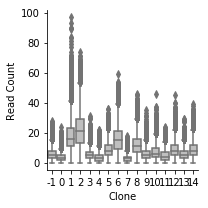

In [44]:

# Distribution of per variant total counts summed across clones

data2 = (
    snv_data.groupby(['chrom', 'coord', 'ref', 'alt', 'cluster_id'])[['total_counts', 'ref_counts', 'alt_counts']]
    .sum().unstack(fill_value=0).stack().reset_index())

plot_data = data2.rename(columns={
    'cluster_id': 'Clone',
    'total_counts': 'Read Count',
})

seaborn.factorplot(x='Clone', y='Read Count', kind='box', data=plot_data, color='0.75', size=3)


In [45]:

import sys
sys.setrecursionlimit(10000)

# min_total_counts_filter = min_total_counts[min_total_counts['total_counts'] >= 4]

sum_alt_counts = snv_data.groupby(['chrom', 'coord', 'ref', 'alt'])['alt_counts'].sum()
present_anywhere_filter = sum_alt_counts[sum_alt_counts > 0].reset_index().drop('alt_counts', axis=1)

data2 = snv_data.copy()
data2['sample_id'] = data2['cell_id'].apply(lambda a: a.split('-')[0])
data2 = data2.merge(cluster_df)
data2 = (
    data2.groupby(['chrom', 'coord', 'cluster_id'])[['alt_counts', 'ref_counts']]
    .sum().unstack(fill_value=0).stack().reset_index())
data2['total_counts'] = data2['ref_counts'] + data2['alt_counts']
data2['vaf'] = data2['alt_counts'] / data2['total_counts']
data2['alt_counts'] = data2['alt_counts'].clip_upper(10)
data2['is_present'] = (data2['alt_counts'] > 0) * 1
data2['is_absent'] = (data2['alt_counts'] == 0) * 1
data2['is_het'] = (data2['alt_counts'] < 0.99 * data2['total_counts']) * data2['is_present']
data2['is_hom'] = (data2['alt_counts'] >= 0.99 * data2['total_counts']) * data2['is_present']
data2['state'] = data2['is_hom'] * 3 + data2['is_het'] * 2 + data2['is_absent']
# data2 = data2[data2['total_counts'] > 0]
# data2 = data2.merge(min_total_counts_filter[['chrom', 'coord', 'ref', 'alt']])
data2 = data2.merge(present_anywhere_filter[['chrom', 'coord', 'ref', 'alt']])
data2 = data2.set_index(['chrom', 'coord', 'cluster_id'])['is_present'].unstack(fill_value=0)
print data2.shape


(12253, 16)


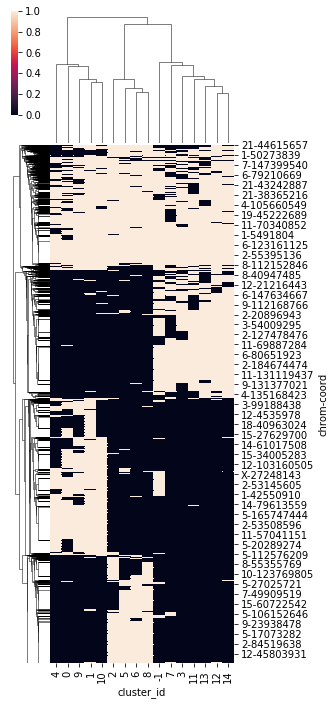

In [46]:

g = seaborn.clustermap(data2, rasterized=True, row_cluster=True, figsize=(4, 12))



# Breakpoints


In [47]:


def get_breakpoint_results(filename):
    store = pd.HDFStore(filename, 'r')

    print store['/breakpoint'].shape[0]

    data = store['/breakpoint']
    data = data.drop(['num_reads', 'num_unique_reads'], axis=1)
    data = data.merge(store['/breakpoint_library'], on='prediction_id')

    print data.shape[0]

    return data


breakpoint_data = []

for sample_id in sample_ids:
    filename = '{}/results/{}_destruct.h5'.format(
        pseudobulk_ticket_id, sample_id)
    filepath = local_results_client.get_url(filename)
    bp_data = get_breakpoint_results(filepath)
    breakpoint_data.append(bp_data)

breakpoint_data = pd.concat(breakpoint_data, ignore_index=True)

breakpoint_data.head()




# breakpoint_filenames = [
#     'SA921_destruct.h5',
#     'SA922_destruct.h5',
#     'SA1090_destruct.h5',
# ]

# breakpoint_filenames = [os.path.join(data_dir, filename) for filename in breakpoint_filenames]

# breakpoint_data = pd.concat([get_breakpoint_results(filename) for filename in breakpoint_filenames])
# breakpoint_data.head()


IOError: ``/home/ubuntu/tantalus_data/SC-1635/results/SA1090_destruct.h5`` does not exist

In [ ]:

breakpoint_data['cell_id'] = breakpoint_data['library']
breakpoint_data['sample_id'] = breakpoint_data['cell_id'].apply(lambda a: a.split('-')[0])
breakpoint_data['sample_id'].unique()


In [ ]:

breakpoint_data.iloc[0]


In [ ]:

breakpoint_data = breakpoint_data.merge(cluster_df)
breakpoint_data.head()
breakpoint_data.groupby('cluster_id').size()


In [ ]:

logical_index = [
    'chromosome_1', 'strand_1', 'position_1',
    'chromosome_2', 'strand_2', 'position_2',
    ]

data = breakpoint_data.groupby(logical_index + ['cluster_id'])[['num_reads', 'num_unique_reads']].sum().reset_index()

data['num_reads'].hist()


In [ ]:

import seaborn

plot_data = data.rename(columns={
    'cluster_id': 'Clone',
    'num_unique_reads': 'Read Count',
})

seaborn.factorplot(y='Read Count', x='Clone', kind='box', data=plot_data, color='0.75', size=4)


In [ ]:

import seaborn
import sys
sys.setrecursionlimit(10000)

data2 = breakpoint_data.copy()

filtered = breakpoint_data.copy()
filtered = filtered[filtered['num_split'] > 4]
filtered = filtered[filtered['template_length_min'] > 250]
filtered = filtered[logical_index].drop_duplicates()

data2 = (
    data2.groupby(logical_index + ['cluster_id'])[['num_unique_reads']]
    .sum().unstack(fill_value=None).stack().reset_index())
data2['is_present'] = (data2['num_unique_reads'] > 0) * 1

print data2.query('position_1 == 28145735')

data2 = data2.merge(filtered)
data2 = data2.set_index(logical_index + ['cluster_id'])['is_present'].unstack(fill_value=None).fillna(0)

mask = data2.isnull()
g = seaborn.clustermap(data2, mask=mask, rasterized=True, figsize=(4, 12))


In [ ]:

import numpy as np

filtered = breakpoint_data.copy()
filtered = filtered[filtered['num_split'] > 4]
filtered = filtered[filtered['template_length_min'] > 250]
filtered['breakpoint_distance'] = (filtered['position_1'] - filtered['position_2']).abs()
bins = np.logspace(0, np.log10(1e10), 11)
filtered['breakpoint_distance_class'] = np.digitize(filtered['breakpoint_distance'], bins)

seaborn.factorplot(hue='rearrangement_type', x='breakpoint_distance_class', data=filtered, kind='count', size=10)



# SNV Signatures


In [ ]:

import wgs_analysis.snvs.mutsig

sigs, sig_prob = wgs_analysis.snvs.mutsig.load_signature_probabilities()


In [ ]:

total_alt_counts = (
    snv_data.groupby(['chrom', 'coord', 'ref', 'alt'])['alt_counts']
    .sum().astype(int).rename('total_alt_counts').reset_index())
snv_data = snv_data.merge(total_alt_counts)

total_total_counts = (
    snv_data.groupby(['chrom', 'coord', 'ref', 'alt'])['total_counts']
    .sum().astype(int).rename('total_total_counts').reset_index())
snv_data = snv_data.merge(total_total_counts)

snv_data = snv_data[snv_data['total_alt_counts'] > 0]

snv_data['is_present'] = snv_data['alt_counts'] > 0
num_present = (
    snv_data.groupby(['chrom', 'coord', 'ref', 'alt'])['is_present']
    .sum().astype(int).rename('num_cells_present').reset_index())
num_present['num_cells_present'].hist(bins=40)
plt.xlabel('Num. Cells Present')
plt.ylabel('SNV Frequency')
snv_data = snv_data.merge(num_present)
snv_data['num_cells_class'] = '1'
snv_data.loc[snv_data['num_cells_present'] > 1, 'num_cells_class'] = '2-5'
snv_data.loc[snv_data['num_cells_present'] > 5, 'num_cells_class'] = '6-20'
snv_data.loc[snv_data['num_cells_present'] > 20, 'num_cells_class'] = '>20'



In [ ]:

plot_data = snv_data.drop_duplicates(['chrom', 'coord', 'ref', 'alt'])
plot_data = plot_data.rename(columns={
    'total_total_counts': 'Agg. Total Counts',
    'num_cells_present': 'Num. Cells Detected',
})

seaborn.lmplot(
    'Num. Cells Detected', 'Agg. Total Counts',
    data=plot_data,
    scatter_kws={'alpha':0.05})


In [ ]:

import wgs_analysis.snvs.mutsig

#
# Per sample signatures
#

snv_sig_data = snv_data[snv_data['tri_nucleotide_context'].notnull()]
snv_sig_data = snv_sig_data.merge(sigs)

# Simple filter for variant sample presence
snv_sig_data = snv_sig_data[snv_sig_data['alt_counts'] > 0]

snv_sig_data2 = snv_sig_data.copy()
snv_sig_data2['num_cells_class'] = 'All'
snv_sig_data2 = pd.concat([snv_sig_data, snv_sig_data2])

sample_sig = wgs_analysis.snvs.mutsig.fit_sample_signatures(
    snv_sig_data2.drop_duplicates(
        ['chrom', 'coord', 'ref', 'alt', 'num_cells_class']),
    sig_prob, 'num_cells_class')

sample_sig


In [ ]:

_ = wgs_analysis.snvs.mutsig.plot_signature_heatmap(sample_sig)


In [ ]:

cluster_sig = wgs_analysis.snvs.mutsig.fit_sample_signatures(
    snv_sig_data.drop_duplicates(['chrom', 'coord', 'ref', 'alt', 'cluster']), sig_prob, 'cluster_id')

_ = wgs_analysis.snvs.mutsig.plot_signature_heatmap(cluster_sig)


In [ ]:

sample_sig = wgs_analysis.snvs.mutsig.fit_sample_signatures(
    snv_sig_data.drop_duplicates(['chrom', 'coord', 'ref', 'alt', 'cluster']), sig_prob, 'sample_id')

_ = wgs_analysis.snvs.mutsig.plot_signature_heatmap(sample_sig)


In [ ]:

import os
import gzip
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

import ith_project.study
import ith_project.analysis.cnv
import ith_project.analysis.variant
import ith_project.analysis.utils
import ith_project.workflow.utils
import wgs_analysis.snvs.mutsig
import wgs_analysis.plots
import wgs_analysis.plots.colors
import wgs_analysis.plots.cnv


seaborn.set_style('ticks')

study_info = ith_project.study.StudyInfo(
    config_filename='/home/ubuntu/ith3/meta_data/config/host/vm/study_config.yaml')

patient_id = 'tov'

snvs = ith_project.analysis.variant.get_snv_table(study_info, patient_id)
snvs = ith_project.analysis.variant.filter_snv_table(snvs)

snvs.head()


In [ ]:

wgs_snv_sig_data = snvs[snvs['tri_nucleotide_context'].notnull()]
wgs_snv_sig_data = wgs_snv_sig_data.merge(sigs)

# Simple filter for variant sample presence
wgs_snv_sig_data = wgs_snv_sig_data[wgs_snv_sig_data['alt_counts'] > 0]

wgs_snv_sig_data2 = wgs_snv_sig_data.copy()
wgs_snv_sig_data2['num_cells_class'] = 'All'
wgs_snv_sig_data2 = pd.concat([wgs_snv_sig_data, wgs_snv_sig_data2])

sample_sig = wgs_analysis.snvs.mutsig.fit_sample_signatures(
    wgs_snv_sig_data2.drop_duplicates(
        ['chrom', 'coord', 'ref', 'alt', 'num_cells_class']),
    sig_prob, 'num_cells_class')

sample_sig

sample_sig = wgs_analysis.snvs.mutsig.fit_sample_signatures(
    wgs_snv_sig_data.drop_duplicates(['chrom', 'coord', 'ref', 'alt', 'sample_id']), sig_prob, 'sample_id')

_ = wgs_analysis.snvs.mutsig.plot_signature_heatmap(sample_sig)


In [ ]:

cols = ['chrom', 'coord', 'ref', 'alt', 'tri_nucleotide_context', 'sample_id', 'tri_nuc_idx']

df1 = wgs_snv_sig_data2[cols]

df2 = snv_sig_data[cols]

df = pd.concat([df1, df2], ignore_index=True)
df.head()

sample_sig = wgs_analysis.snvs.mutsig.fit_sample_signatures(
    df.drop_duplicates(['chrom', 'coord', 'ref', 'alt', 'sample_id']), sig_prob, 'sample_id')

_ = wgs_analysis.snvs.mutsig.plot_signature_heatmap(sample_sig)


In [ ]:

sample_sig.T.corr()


In [ ]:


import os
import gzip
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

import ith_project.study
import ith_project.analysis.cnv
import ith_project.analysis.variant
import ith_project.analysis.utils
import ith_project.workflow.utils
import wgs_analysis.snvs.mutsig
import wgs_analysis.plots
import wgs_analysis.plots.colors
import wgs_analysis.plots.cnv


patient_id = 'tov'

study_info = ith_project.study.StudyInfo(
    config_filename='/home/ubuntu/ith3/meta_data/config/host/vm/study_config.yaml')

cn_table = ith_project.analysis.cnv.get_copies(study_info, patient_id)
cn_table.iloc[0]


In [ ]:

from wgs_analysis.plots.cnv import plot_cnv_genome

dlp_cn = []

for sample_id, sample_cn_data in cn_data.groupby('sample_id'):
    plot_data = sample_cn_data.groupby(['chr', 'start', 'end'])['integer_copy_number'].mean().reset_index()
    plot_data['chromosome'] = plot_data['chr']
    plot_data['integer_copy_number2'] = plot_data['integer_copy_number']
    plot_data['sample_id'] = sample_id
    dlp_cn.append(plot_data)
    plt.figure(figsize=(14, 3))
    plot_cnv_genome(
        plt.gca(), plot_data,
        major_col='integer_copy_number', minor_col='integer_copy_number2',
        maxcopies=6)

dlp_cn = pd.concat(dlp_cn, ignore_index=True)

dlp_cn.head()


In [ ]:

cn_table['total_raw'] = cn_table['major_raw'] + cn_table['minor_raw']
cn_table['total_raw1'] = cn_table['major_raw'] + cn_table['minor_raw']

plt.figure(figsize=(14, 3))
plot_cnv_genome(
    plt.gca(), cn_table.query('sample_id == "ov2295_2"'),
    major_col='total_raw', minor_col='total_raw1',
    maxcopies=6)

plt.figure(figsize=(14, 3))
plot_cnv_genome(
    plt.gca(), cn_table.query('sample_id == "tov2295"'),
    major_col='total_raw', minor_col='total_raw1',
    maxcopies=6)


In [ ]:

dlp_cn.head()


In [ ]:

cn_table.head()
cn_table.loc[cn_table['start'] == 0, 'start'] = 1

columns = [
    'total_raw',
]

cn_table_uniform = uniform_segment_copies(cn_table, 'sample_id', columns)
cn_table_uniform = (
    cn_table_uniform
    .set_index(['chromosome', 'segment_start', 'segment_end', 'sample_id']))['total_raw']
cn_table_uniform = cn_table_uniform.unstack()
print cn_table_uniform.head()


allele_cn['chromosome'] = allele_cn['chr']
allele_cn['major'] = allele_cn['major_cn']
allele_cn['minor'] = allele_cn['minor_cn']

columns = [
    'integer_copy_number',
]

dlp_cn_uniform = uniform_segment_copies(dlp_cn, 'sample_id', columns)
dlp_cn_uniform = dlp_cn_uniform.set_index(['chromosome', 'segment_start', 'segment_end', 'sample_id'])['integer_copy_number']
dlp_cn_uniform = dlp_cn_uniform.unstack()
print dlp_cn_uniform.head()


In [ ]:

data = pd.concat([dlp_cn_uniform, cn_table_uniform], axis=1).corr()
data = data.loc[cn_table_uniform.columns, dlp_cn_uniform.columns]

seaborn.heatmap(data)


In [ ]:

from wgs_analysis.plots.cnv import plot_cnv_genome


plt.figure(figsize=(14, 3))
plot_cnv_genome(plt.gca(), cn_table.query('sample_id == "ov2295_2"'), major_col='major_1', minor_col='minor_1')

plt.figure(figsize=(14, 3))
plot_cnv_genome(plt.gca(), cn_table.query('sample_id == "ov2295_2"'), major_col='major_2', minor_col='minor_2')

plt.figure(figsize=(14, 3))
plot_cnv_genome(plt.gca(), cn_table.query('sample_id == "tov2295"'), major_col='major_1', minor_col='minor_1')

plt.figure(figsize=(14, 3))
plot_cnv_genome(plt.gca(), cn_table.query('sample_id == "tov2295"'), major_col='major_2', minor_col='minor_2')


In [ ]:

from wgs_analysis.plots.cnv import plot_cnv_genome

for cluster_id in allele_cn['cluster_id'].unique():
    plt.figure(figsize=(14, 3))
    plot_cnv_genome(
        plt.gca(),
        allele_cn.query('cluster_id == {}'.format(cluster_id)),
        major_col='major_cn', minor_col='minor_cn')


In [ ]:

# def create_uniform_segments(segment_length):
#     """
#     Create a table of uniform segments with a given segment length

#     Args:
#         segment_length (int): uniform segment length

#     Returns:
#         pandas.DataFrame: table of uniform segments

#     The returned table will have columns chrom, start, end.  Segments are created according
#     to chromosome lengths.
#     """

#     num_segments = (wgs_analysis.refgenome.info.chromosome_lengths.astype(float) / segment_length).apply(np.ceil)

#     chroms = np.concatenate([np.repeat(c, n) for c, n in num_segments.iteritems()])
#     starts = np.concatenate([np.arange(0, m*segment_length, segment_length) for c, m in num_segments.iteritems()])

#     chroms = chroms.astype(str)
#     starts = starts.astype(int) + 1

#     segments = pd.DataFrame({'chromosome':chroms, 'start':starts})
#     segments['end'] = segments['start'] + segment_length - 1

#     return segments

# def uniform_resegment(cnv, segment_length=100000):
#     """
#     Create a table of uniform segments data from arbitrary segments segment data

#     Args:
#         cnv (pandas.DataFrame): segment data
#         segment_length (int): uniform segment length

#     Returns:
#         pandas.DataFrame: resegmented table

#     The cnv table should have columns chrom, start, end.  Returns a resegmented
#     table with columns chrom, start, end, start_reseg, end_reseg.  Original 
#     rows will be represented multiple times if they are split by uniform segments,
#     and can be identified by having the same chrom, start, end.  The start_reseg
#     and end_reseg columns represent the subsegment resulting from the split.
#     """

#     # First segment cannot start at coordinate less than 1
#     assert cnv['start'].min() >= 1

#     # Uniquely index segments
#     cnv = cnv[['chromosome', 'start', 'end']].drop_duplicates()
#     cnv['idx'] = xrange(len(cnv.index))

#     # Set of start coordinates
#     cn_starts = cnv[['idx', 'chromosome', 'start']]

#     # Create a table of fill segments
#     cn_fill = cnv[['chromosome', 'end']].rename(columns={'end':'start'})

#     # Annotate last segment of each chromosome
#     cn_fill.set_index('chromosome', inplace=True)
#     cn_fill['max_start'] = cn_fill.groupby(level=0)['start'].max()
#     cn_fill.reset_index(inplace=True)

#     # Last segment of each chromosome is wrapped around to be used as first segment in fill
#     cn_fill.loc[cn_fill['start'] == cn_fill['max_start'], 'start'] = 1
#     cn_fill = cn_fill.drop('max_start', axis=1)
#     cn_fill = cn_fill.drop_duplicates()

#     # Add fill starts to original segment starts
#     cn_starts = cn_starts.merge(cn_fill, on=['chromosome', 'start'], how='outer')
#     cn_starts['idx'] = cn_starts['idx'].fillna(-1).astype(int)

#     # Create table of uniform segment starts
#     uniform_starts = create_uniform_segments(segment_length)[['chromosome', 'start']]

#     # Create a union set of segment start points
#     union_starts = cn_starts.merge(uniform_starts, on=['chromosome', 'start'], how='outer')

#     # Intermediate start coordinates with NAN index are uniform segment
#     # boundaries for uniform segments that intersect original segments.
#     # Set the idx for these to that of the previous start to mark them
#     # as a continuation of the previous original segment that has been
#     # cut somewhere in the middle.
#     union_starts = union_starts.sort_values(['chromosome', 'start'])
#     union_starts['idx'] = union_starts['idx'].fillna(method='ffill').astype(int)
#     union_starts = union_starts[union_starts['idx'] != -1]

#     # Merge original segment information and select the end as the minimum
#     # of the original segment or the uniform segment for segments that have
#     # been cut
#     union_segments = union_starts.merge(cnv[['idx', 'end']], on='idx')
#     union_segments['end'] = np.minimum(
#         union_segments['end'],
#         union_segments['start'] + segment_length - 1)

#     # Final segments will have original start and end, in addition to a
#     # resegmented start_1 and end_1
#     union_segments = union_segments.merge(cnv[['idx', 'start', 'end']], on='idx', suffixes=('_reseg', ''))

#     union_segments = union_segments.drop('idx', axis=1)

#     return union_segments


# def uniform_segment_copies(cnv, sample_column, data_columns, segment_length=100000):
#     """
#     Create a table of uniformly segmented data from arbitrarily segment data

#     Args:
#         cnv (pandas.DataFrame): segment data
#         sample_column (list): sample id column
#         data_columns (list): data columns to resegment
#         segment_length (int): uniform segment length

#     Returns:
#         pandas.DataFrame: resegmented table

#     The cnv table should have site_id, chrom, start and end columns in addition to
#     the columns for which resegmentation is requested.  Returns a resegmented table
#     with site_id, chrom, segment_start, segment_end columns, in addition to the 
#     requested columns calculated as length weighted averages of the original values.
#     """

#     cnv_reseg = uniform_resegment(cnv, segment_length=100000)

#     cnv_reseg = cnv_reseg.merge(cnv, on=['chromosome', 'start', 'end'])

#     cnv_reseg['segment_start'] = cnv_reseg['start_reseg'] / segment_length
#     cnv_reseg['segment_start'] = cnv_reseg['segment_start'].astype(int) * segment_length + 1

#     cnv_reseg.set_index([sample_column, 'chromosome', 'segment_start'], inplace=True)

#     # Average requested columns weighted by length of segment
#     # exclude null values in calculation
#     for column in data_columns:

#         # Length of resegmented segments
#         cnv_reseg['length_reseg'] = cnv_reseg['end_reseg'] - cnv_reseg['start_reseg'] + 1

#         # Mask segments with null values from normalization calculation
#         cnv_reseg['length_reseg'] *= (cnv_reseg[column].notnull() * 1)

#         # Normalize by total length of resegmented segments
#         cnv_reseg['length_total_reseg'] = cnv_reseg.groupby(level=[0, 1, 2])['length_reseg'].sum()
#         cnv_reseg['weight_reseg'] = (
#             cnv_reseg['length_reseg'].astype(float) /
#             cnv_reseg['length_total_reseg'].astype(float))
#         cnv_reseg[column] *= cnv_reseg['weight_reseg']

#         # Mask segments with null values from summation
#         cnv_reseg[column] = cnv_reseg[column].fillna(0.0)
    
#     cnv_reseg = cnv_reseg.groupby(level=[0, 1, 2])[columns].sum()

#     cnv_reseg.reset_index(inplace=True)

#     # Ensure the segments are consistent regardless of the cnv data
#     seg_full = (
#         create_uniform_segments(segment_length)
#         .rename(columns={'start':'segment_start'})
#         .set_index(['chromosome', 'segment_start']))

#     cnv_reseg = (
#         cnv_reseg
#         .set_index(['chromosome', 'segment_start', sample_column])
#         .unstack()
#         .reindex(seg_full.index)
#         .stack(dropna=False)
#         .reset_index())

#     cnv_reseg['segment_end'] = cnv_reseg['segment_start'] + segment_length - 1

#     return cnv_reseg


In [ ]:

from wgs_analysis.plots.cnv import uniform_segment_copies

cn_table.head()
cn_table.loc[cn_table['start'] == 0, 'start'] = 1

columns = [
    'major_1', 'minor_1',
    'major_2', 'minor_2',
]

cn_table_uniform = uniform_segment_copies(cn_table, 'sample_id', columns)
cn_table_uniform = (
    cn_table_uniform
    .set_index(['chromosome', 'segment_start', 'segment_end', 'sample_id']))
cn_table_uniform.columns = pd.MultiIndex.from_tuples([a.split('_')[::-1] for a in cn_table_uniform.columns])
cn_table_uniform = cn_table_uniform.stack()
cn_table_uniform = cn_table_uniform.swaplevel(3, 4).unstack()
cn_table_uniform.head()


In [ ]:

allele_cn['chromosome'] = allele_cn['chr']
allele_cn['major'] = allele_cn['major_cn']
allele_cn['minor'] = allele_cn['minor_cn']

columns = [
    'major', 'minor',
]

allele_cn_uniform = uniform_segment_copies(allele_cn, 'cluster_id', columns)
allele_cn_uniform = allele_cn_uniform.set_index(['chromosome', 'segment_start', 'segment_end', 'cluster_id']).stack()
allele_cn_uniform = allele_cn_uniform.swaplevel(3, 4).unstack()
allele_cn_uniform.head()


In [ ]:

data = allele_cn_uniform.merge(cn_table_uniform, left_index=True, right_index=True).corr()
data = data.loc[cn_table_uniform.columns, allele_cn_uniform.columns]

seaborn.heatmap(data)






Sample ID: 	SA921
Taxonomy ID: 	9606
Sample type: 	Cell Line
Anonymous patient ID: 	DAH355
Cell line ID: 	TOV2295(R)
    
    

    Sample ID: 	SA922
Taxonomy ID: 	9606
Sample type: 	Cell Line
Anonymous patient ID: 	None
Cell line ID: 	OV2295(R2)
    
    
    